In [10]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial
from script.eval import Plots_for
from script.Verification import verification

In [11]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 1
batch_size = 1

number_of_adversarial_samples = 1000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [12]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [13]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


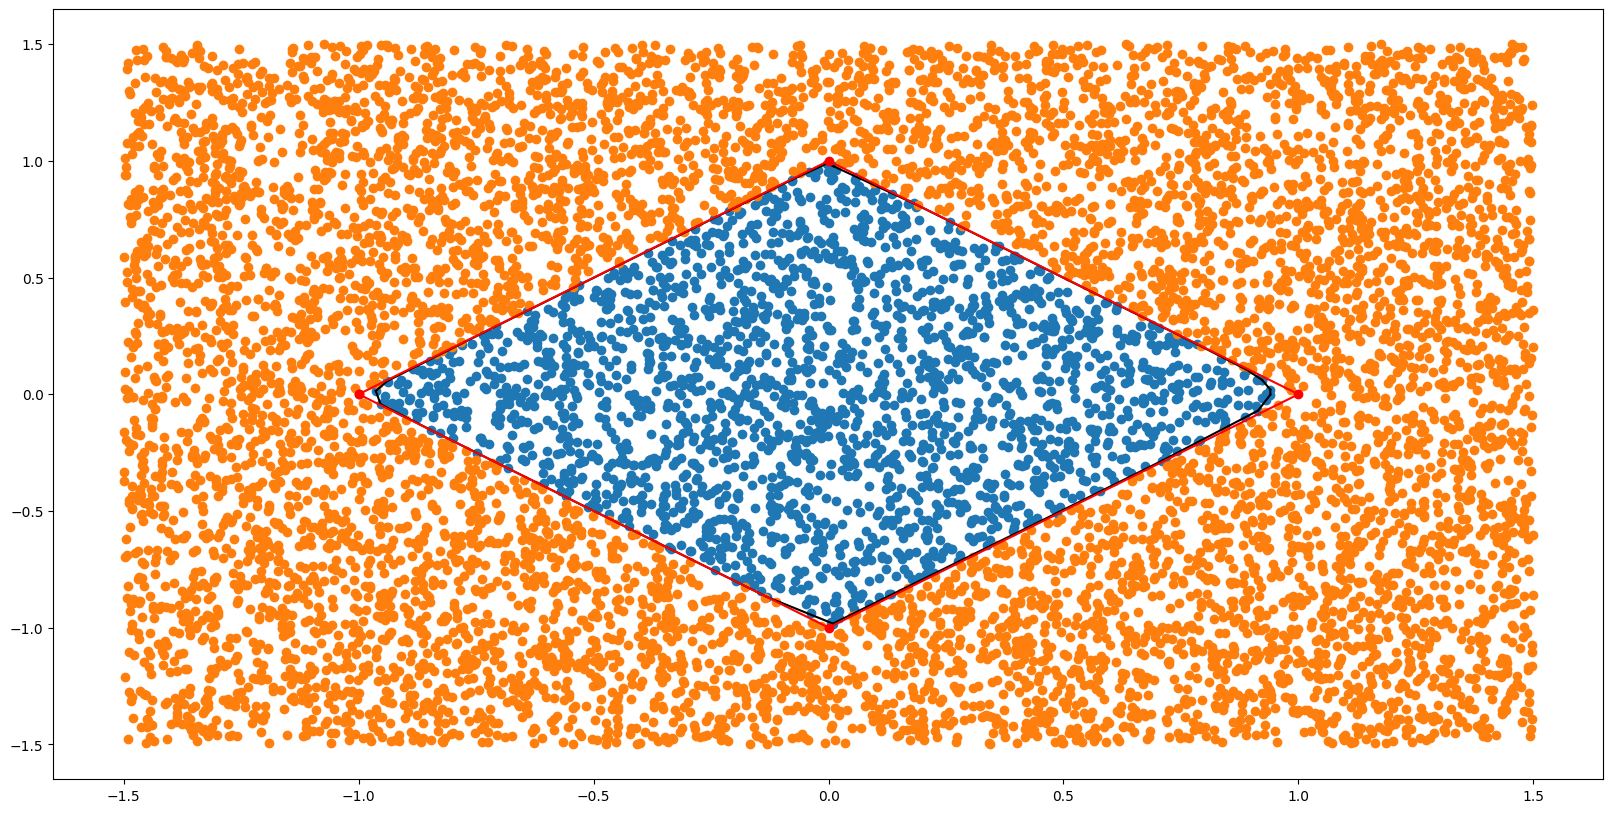

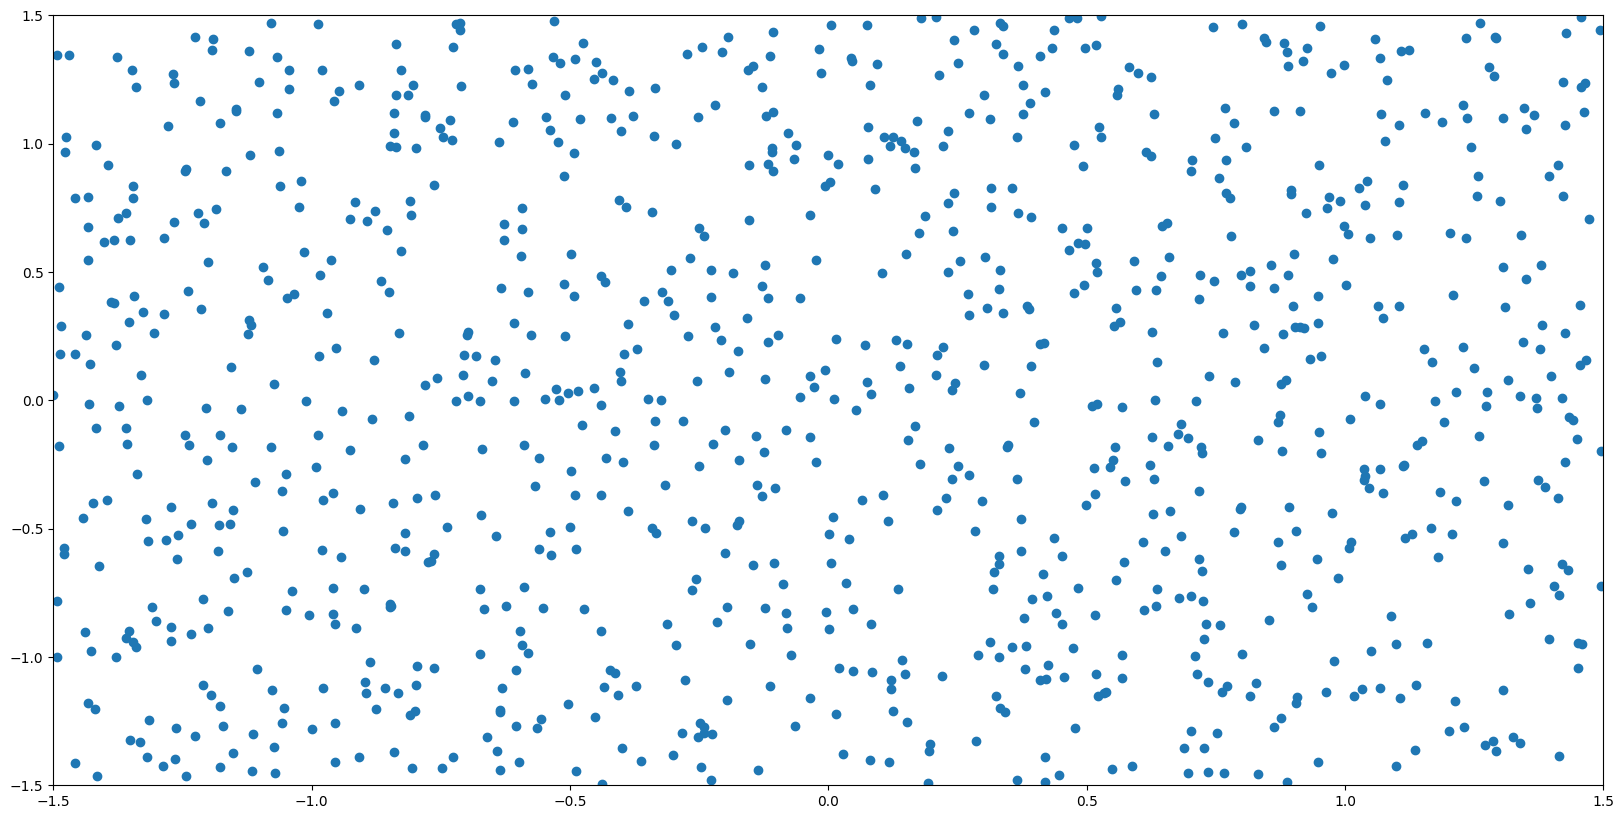

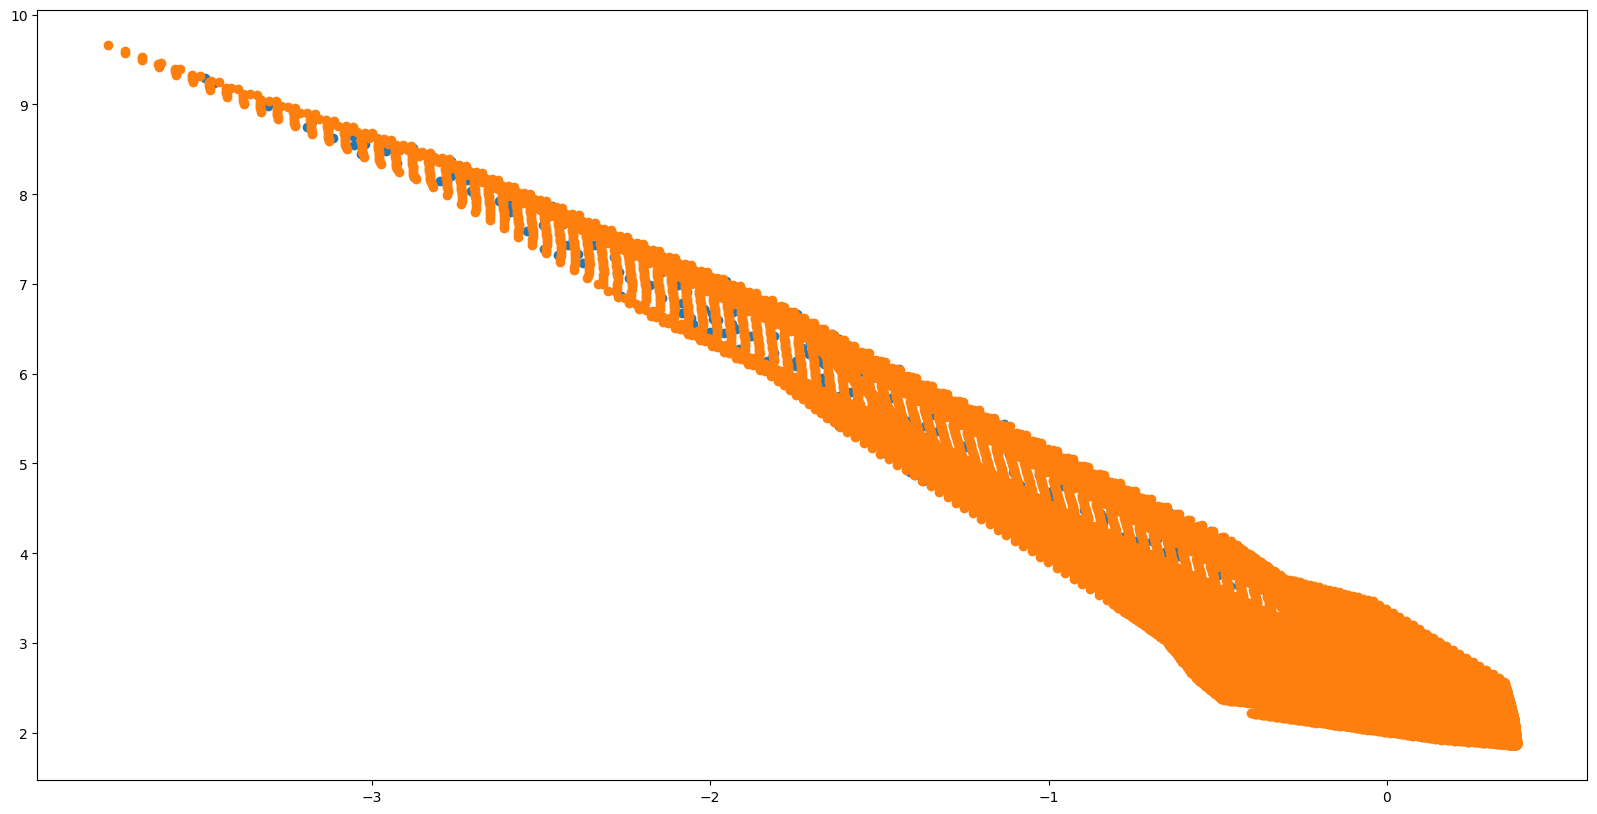

In [14]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


In [15]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs)


=== Epoch: 0===
batch = 0, mean loss = 1.9668773252543652, l_pos = 0.8725703177530089, l_neg = 0.4681430847827794, l_gen = 0.6261639227185769
batch = 100, mean loss = 1.760089281986112, l_pos = 0.7424628066471683, l_neg = 0.17743337703604659, l_gen = 0.8401930983028965
batch = 200, mean loss = 1.7092241758603757, l_pos = 0.6983961155579659, l_neg = 0.12790429863163102, l_gen = 0.8829237616707794
batch = 300, mean loss = 1.673969875192417, l_pos = 0.6661958098035888, l_neg = 0.10131714356525501, l_gen = 0.9064569218235732
batch = 400, mean loss = 1.646004668064229, l_pos = 0.639989692943774, l_neg = 0.08328483022636002, l_gen = 0.9227301448940959
batch = 500, mean loss = 1.6238224273667532, l_pos = 0.6189024680240437, l_neg = 0.07164014436920015, l_gen = 0.9332798149735106
batch = 600, mean loss = 1.6018475805585857, l_pos = 0.5976872721217106, l_neg = 0.06320326680990275, l_gen = 0.9409570416269739
batch = 700, mean loss = 1.579503699896301, l_pos = 0.5759107191696083, l_neg = 0.056258

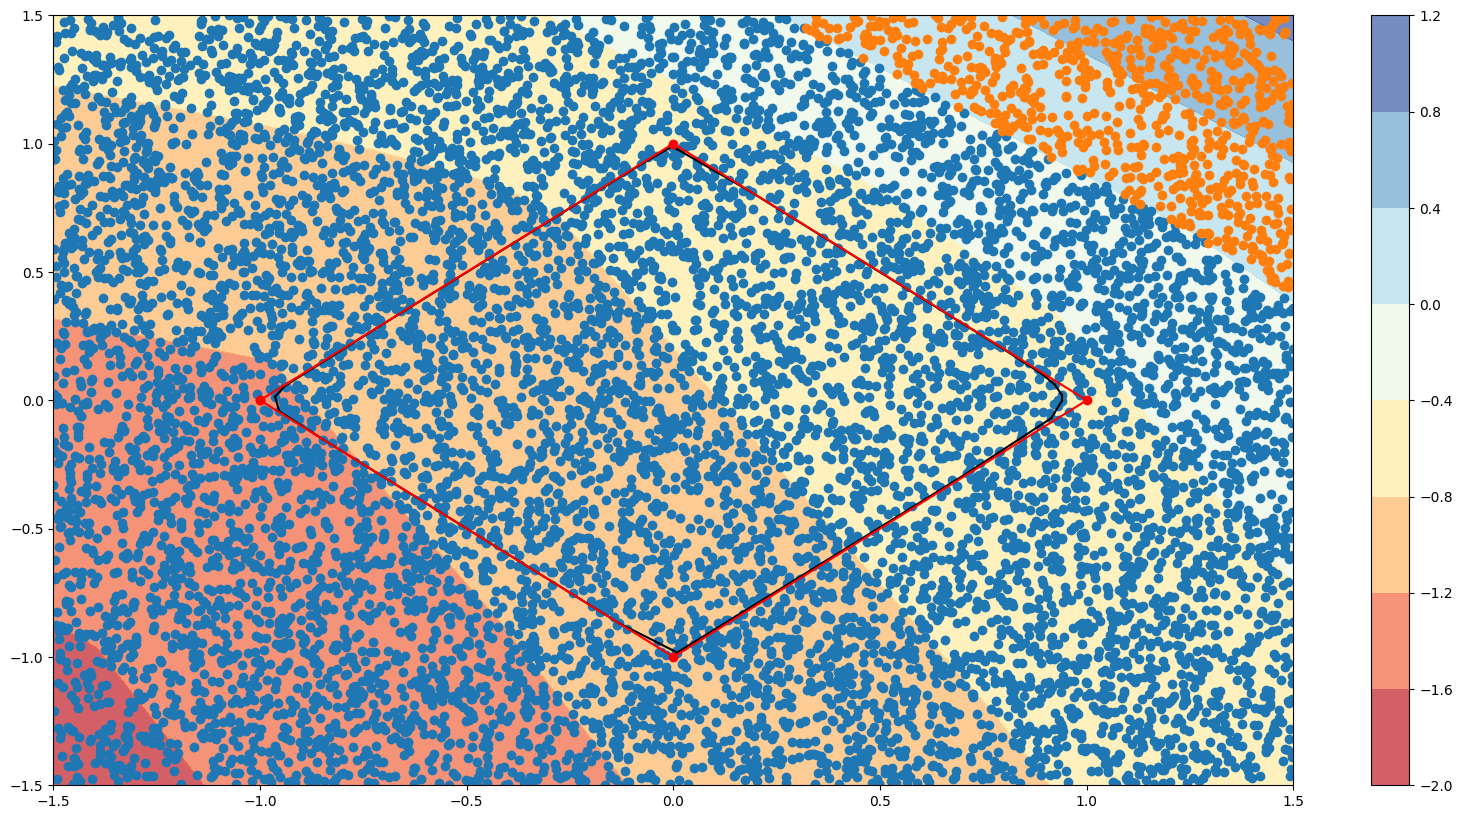

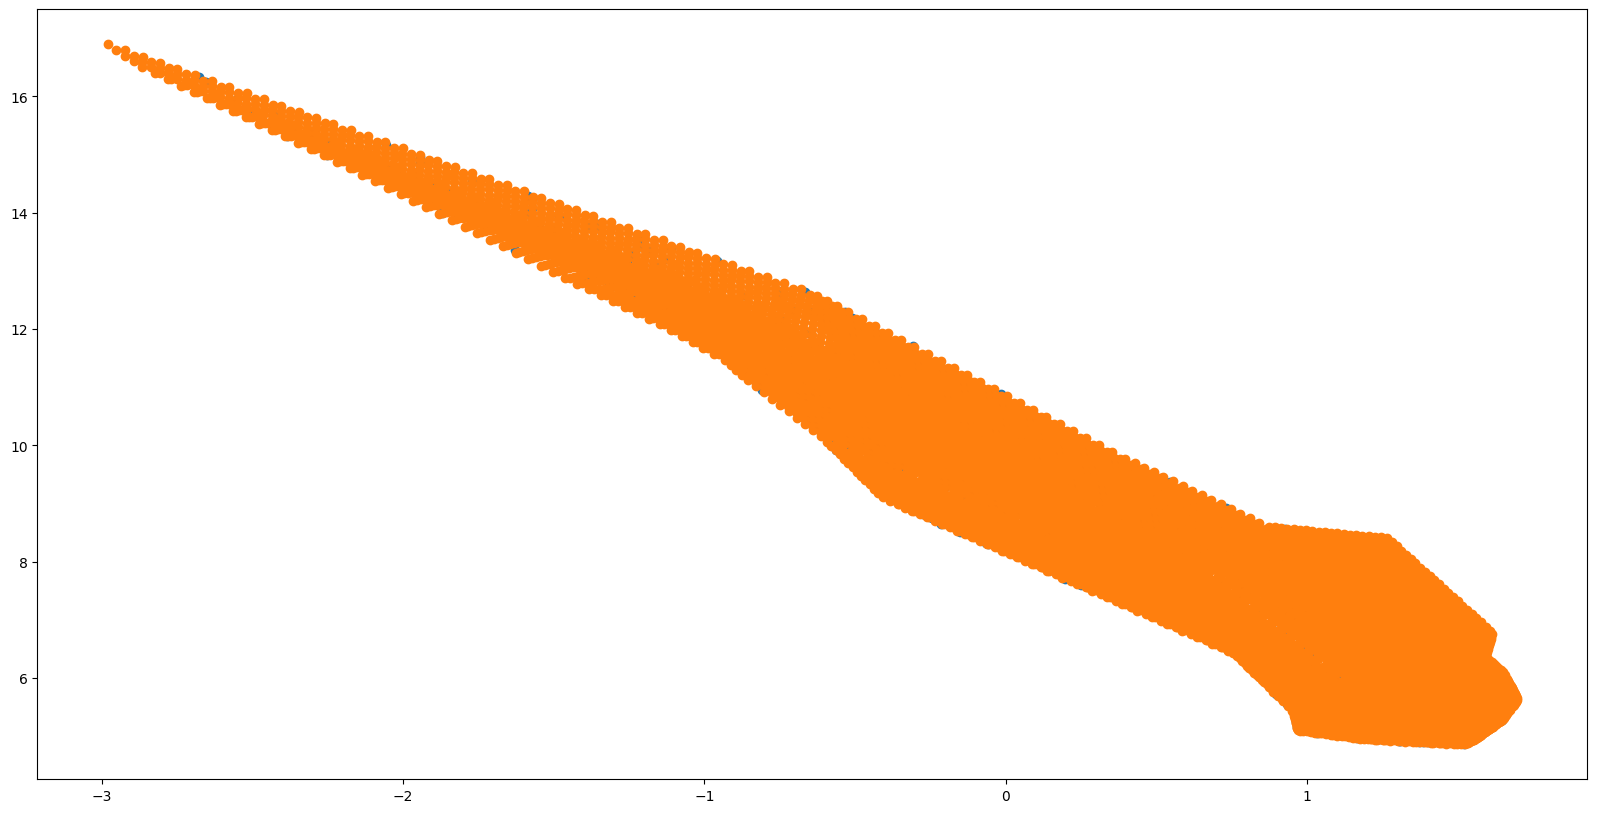

In [16]:
plots.plt_mesh()
plots.plt_adversarial_dotted()

In [17]:
result = verification(icnn, sequential=False)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 358 nonzeros
Model fingerprint: 0xa0251221
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [5e-03, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+02]
  RHS range        [5e-02, 1e+02]
Presolve removed 58 rows and 44 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 0

Model is infeasible or unbounded
Best objective -, best bound -, gap -


TypeError: '<=' not supported between instances of 'Tensor' and 'NoneType'

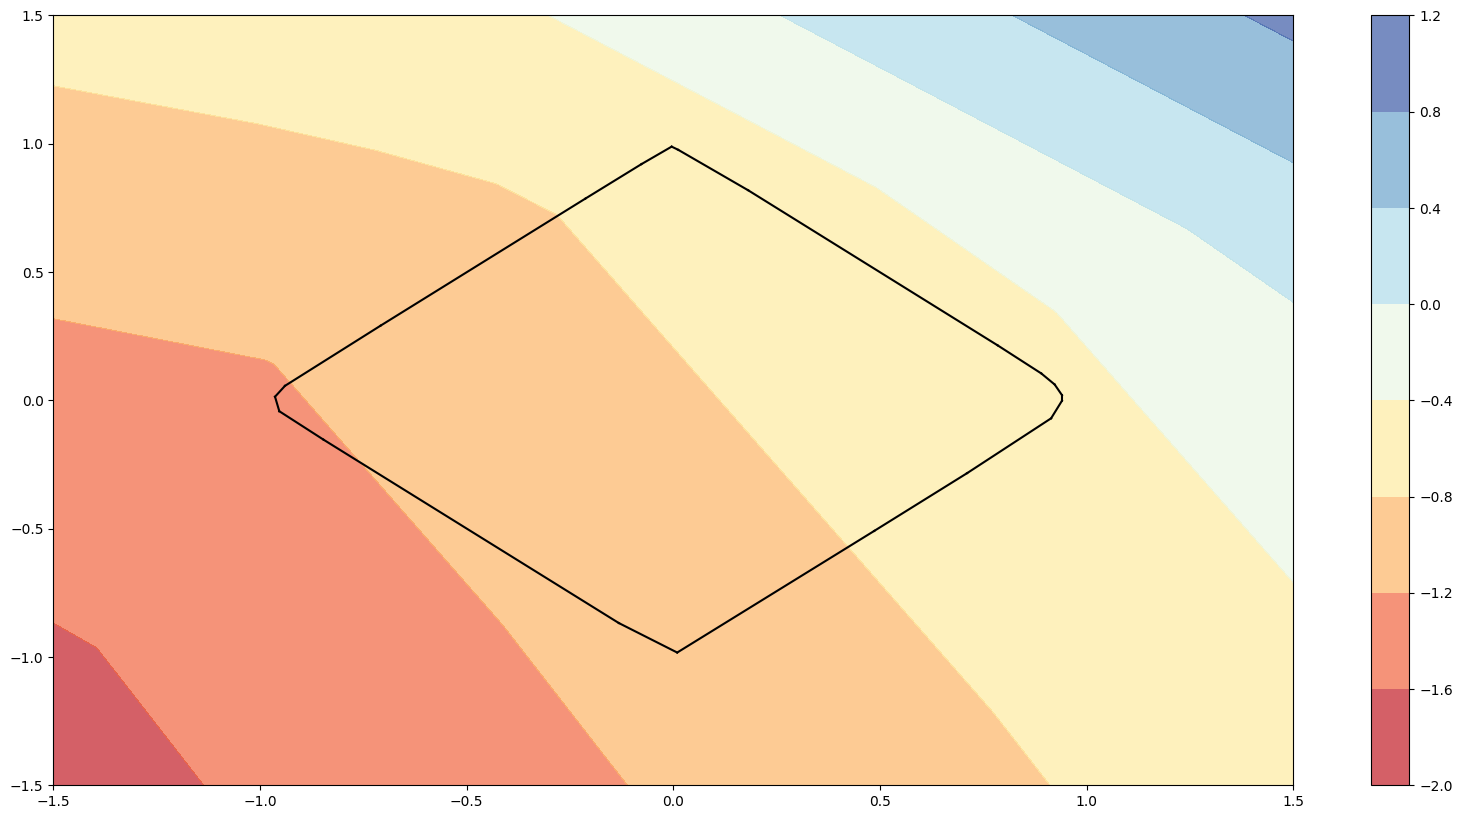

In [18]:
plots.c = result
plots.plt_mesh()